<a href="https://colab.research.google.com/github/AboudOnji/Algorithms/blob/main/ClassificacionEx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este es un experimento en Python

In [1]:
# Para cargar el dataset Iris y dividir los datos
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Para el modelo de clasificación (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier

# Para evaluar el modelo
from sklearn.metrics import accuracy_score

# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización
import matplotlib.pyplot as plt
import seaborn as sns

print("Librerías importadas correctamente!")


Librerías importadas correctamente!


In [2]:
# Cargar el dataset
iris = load_iris()

# Los datos vienen en un formato especial tipo diccionario.
# iris.data contiene las características (features) - longitud/ancho de sépalo/pétalo
# iris.target contiene las etiquetas (clases de flor: 0, 1, 2)
# iris.feature_names son los nombres de las características
# iris.target_names son los nombres de las clases de flor

# Guardamos las características en X y las etiquetas en y
X = iris.data
y = iris.target

# Veamos cuántos datos y características tenemos
print(f"Forma de las características (X): {X.shape}") # (muestras, características)
print(f"Forma de las etiquetas (y): {y.shape}")     # (muestras,)
print(f"Nombres de las características: {iris.feature_names}")
print(f"Nombres de las clases (target): {iris.target_names}")
print(f"Primeras 5 filas de características:\n{X[:5]}")
print(f"Primeras 5 etiquetas: {y[:5]}")

Forma de las características (X): (150, 4)
Forma de las etiquetas (y): (150,)
Nombres de las características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nombres de las clases (target): ['setosa' 'versicolor' 'virginica']
Primeras 5 filas de características:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Primeras 5 etiquetas: [0 0 0 0 0]


Primeras 5 filas del DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Generando Pairplot...


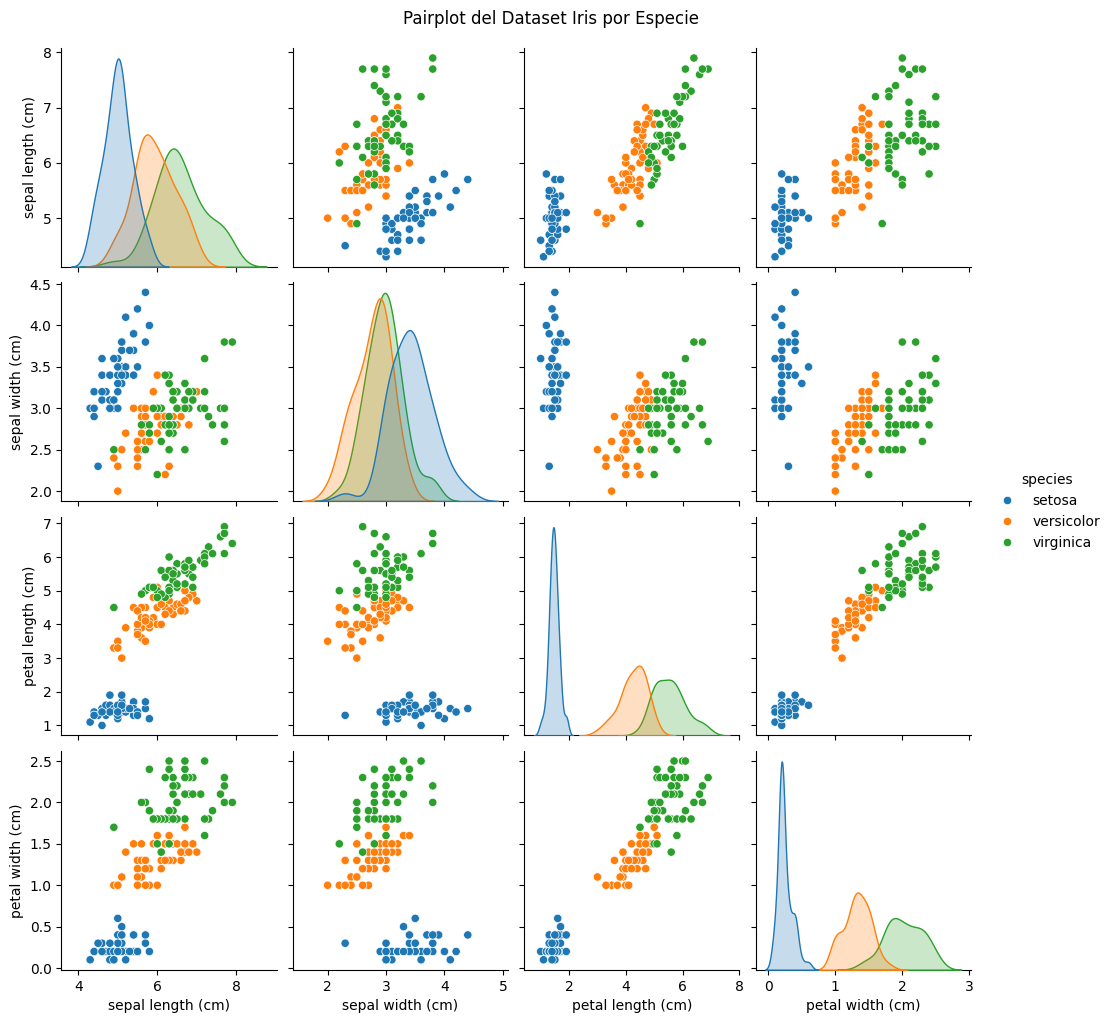

Pairplot generado.


In [6]:
# Convertir a DataFrame de Pandas para facilitar la visualización
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
# Añadir la columna de especies (target) para poder colorear por clase
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar las primeras filas del DataFrame
print("Primeras 5 filas del DataFrame:")
print(iris_df.head())
print("\n") # Salto de línea para separar

# Crear un gráfico 'pairplot' con Seaborn
# Muestra la relación entre cada par de características y la distribución de cada una.
# Los puntos se colorean según la especie ('hue='species').
print("Generando Pairplot...")
sns.pairplot(iris_df, hue='species')
plt.suptitle("Pairplot del Dataset Iris por Especie", y=1.02) # Título encima del gráfico
plt.show() # Muestra el gráfico
print("Pairplot generado.")

In [7]:
# Dividir los datos: 70% para entrenamiento, 30% para prueba
# test_size=0.3 significa que el 30% de los datos serán para el conjunto de prueba.
# random_state=42 asegura que la división sea la misma cada vez que ejecutemos el código (reproducibilidad).
# stratify=y asegura que la proporción de cada clase (especie de flor) sea la misma en los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño de etiquetas de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño de etiquetas de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (105, 4)
Tamaño del conjunto de prueba (X_test): (45, 4)
Tamaño de etiquetas de entrenamiento (y_train): (105,)
Tamaño de etiquetas de prueba (y_test): (45,)


In [8]:
# Crear una instancia del clasificador KNN con k=3 vecinos
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

print(f"Modelo KNN creado con k={k}")

Modelo KNN creado con k=3


In [9]:
# Entrenar el modelo usando los datos de entrenamiento
knn_model.fit(X_train, y_train)

print("Modelo KNN entrenado con los datos de entrenamiento.")

Modelo KNN entrenado con los datos de entrenamiento.


In [10]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Veamos algunas predicciones comparadas con los valores reales
print(f"Predicciones (y_pred): {y_pred[:10]}") # Muestra las primeras 10 predicciones
print(f"Valores Reales (y_test): {y_test[:10]}") # Muestra las primeras 10 etiquetas reales

Predicciones (y_pred): [2 1 1 1 2 2 1 1 0 2]
Valores Reales (y_test): [2 1 2 1 2 2 1 1 0 2]


In [11]:
# Calcular la precisión (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f"La precisión (accuracy) del modelo KNN (k={k}) en el conjunto de prueba es: {accuracy:.4f}")
# Imprimimos el resultado como porcentaje también
print(f"Esto significa que el modelo clasificó correctamente el {accuracy*100:.2f}% de las flores del conjunto de prueba.")

La precisión (accuracy) del modelo KNN (k=3) en el conjunto de prueba es: 0.9556
Esto significa que el modelo clasificó correctamente el 95.56% de las flores del conjunto de prueba.


In [13]:
# una forma para visualizar el contenido que tiene la biblioteca sklearn.dataset es:
## Usar dir()
import sklearn.datasets
contenido_datasets = dir(sklearn.datasets)


In [15]:
print("Contenido de sklearn.datasets:")
for nombre in contenido_datasets:
  # Podemos filtrar un poco para no mostrar los nombres internos que empiezan con '_'
  if not nombre.startswith('_'):
    print(f"- {nombre}")

Contenido de sklearn.datasets:
- clear_data_home
- data
- descr
- dump_svmlight_file
- fetch_20newsgroups
- fetch_20newsgroups_vectorized
- fetch_california_housing
- fetch_covtype
- fetch_file
- fetch_kddcup99
- fetch_lfw_pairs
- fetch_lfw_people
- fetch_olivetti_faces
- fetch_openml
- fetch_rcv1
- fetch_species_distributions
- get_data_home
- load_breast_cancer
- load_diabetes
- load_digits
- load_files
- load_iris
- load_linnerud
- load_sample_image
- load_sample_images
- load_svmlight_file
- load_svmlight_files
- load_wine
- make_biclusters
- make_blobs
- make_checkerboard
- make_circles
- make_classification
- make_friedman1
- make_friedman2
- make_friedman3
- make_gaussian_quantiles
- make_hastie_10_2
- make_low_rank_matrix
- make_moons
- make_multilabel_classification
- make_regression
- make_s_curve
- make_sparse_coded_signal
- make_sparse_spd_matrix
- make_sparse_uncorrelated
- make_spd_matrix
- make_swiss_roll
- textwrap


In [16]:
# Otra manera es usar help
# Obtener ayuda específica para la función load_breast_cancer
help(sklearn.datasets.load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
    downloaded from:
    https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more informatio